In [1]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



# Generating Random Networks

## 1.  Create random networks using Erdös-Rényi (ER) model

### a, b

Probability : 0.003 
Mean : 3.144 
Variance : 3.180444 
Is connected? : FALSE 
gcc size : 937 
Probability : 0.004 
Mean : 4.116 
Variance : 4.174719 
Is connected? : FALSE 
gcc size : 983 
Probability : 0.01 
Mean : 9.854 
Variance : 9.480164 
Is connected? : TRUE 
gcc size : 1000 
Probability : 0.05 
Mean : 50.34 
Variance : 49.7001 
Is connected? : TRUE 
gcc size : 1000 
Probability : 0.1 
Mean : 99.236 
Variance : 96.90521 
Is connected? : TRUE 
gcc size : 1000 


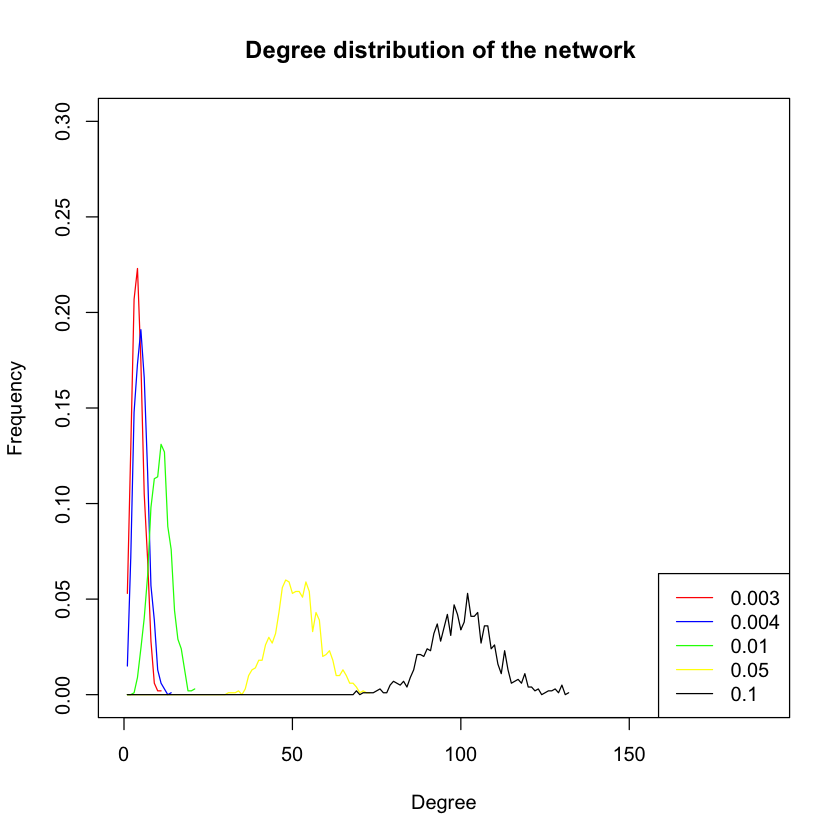

In [36]:
set.seed(12345)
pl = c(0.003,0.004,0.01,0.05,0.1)
cols =c('red','blue','green','yellow','black')
gl_map = c()
tmp =0
for( p in pl){
    cat("Probability :",p,"\n")
    g = erdos.renyi.game(1000, p, directed=F)
    degreesVector <- degree(g)
    #hist(degreesVector)
    cat("Mean :",mean(degreesVector),"\n")
    cat("Variance :",var(degreesVector),"\n")
    cat("Is connected? :", is.connected(g),"\n")
    g.components <- clusters(g)
    #print(g.components$csize)
    # which is the largest component
    ix <- which.max(g.components$csize)
    tmp = tmp+1
    if(tmp==1)
        plot(col=cols[tmp],xlim=c(0,190),ylim =c(0,0.25),degree.distribution(g),main=paste("Degree distribution of the network "),xlab="Degree",ylab="Frequency",type='l')
    else{
        lines(col=cols[tmp],degree.distribution(g),main=paste("Degree distribution of the network"),xlab="Degree",ylab="Frequency",type='l')
    }
    # get the subgraph correspondent to just the giant component
    g.giant <- induced.subgraph(g, which(g.components$membership == ix))
    cat("gcc size :",vcount(g.giant),"\n")
}
legend("bottomright", legend=pl,col=cols, lwd=1)


### C

In [14]:
pl2 = c(0.001, 0.002, 0.0025, 0.003,0.004,0.006,0.008,0.01,0.05,0.1)

In [15]:
x = c()
for(p in pl2){
    x = c(x, rep(p,100))
}

In [74]:
cl = c()
set.seed(12345)
for( p in pl2){
    connected_c = 0
    for(i in 1:100){
        g = erdos.renyi.game(1000, p, directed=F)
        degreesVector <- degree(g)
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
       # print(vcount(g.giant)/1000)
        if(is.connected(g)){
            connected_c = connected_c+1
        }
        cl = c(cl,vcount(g.giant)/1000)
        
    }
    cat(p," ", connected_c/100,"\n")
    
}


0.001   0 
0.002   0 
0.0025   0 
0.003   0 
0.004   0 
0.006   0.05 
0.008   0.74 
0.01   0.94 
0.05   1 
0.1   1 


In [17]:
library('RColorBrewer')
colbox<-brewer.pal(n=10,name="Set3")
cols_ = c()
for(x_ in x){
    cols_ = c(cols_,colbox[match(x,pl2)])
}

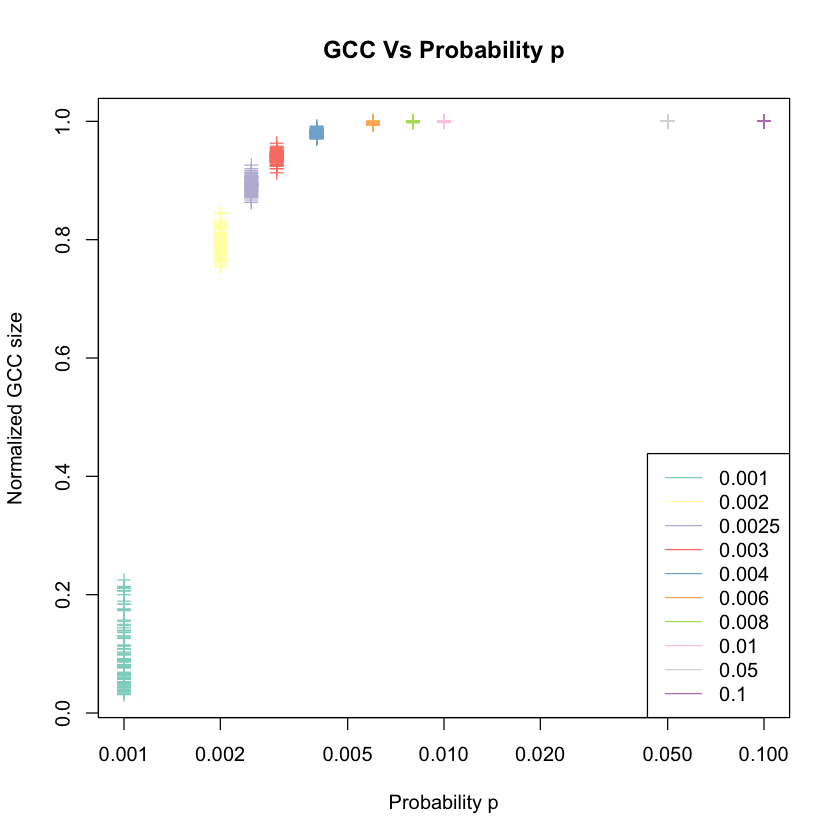

In [33]:
plot(x, cl, pch = 3,log='x',main="GCC Vs Probability p", col = cols_,ylab="Normalized GCC size", xlab="Probability p")
legend("bottomright", legend=pl2,col=colbox, lwd=1)


### d

In [67]:
do_expected_gcc <- function(deg, plot_ = 'TRUE'){
    set.seed(12345)
    nrange <- 1:100
    iter <- 1:100
    cl =c()
    for(n in nrange){
        temp = c()
        p = deg/(n*100)
        for(i in iter){
        #cat("p ",p," n ",n,"\n")
        g = erdos.renyi.game(n*100, deg/(n*100), directed=F)
        degreesVector <- degree(g)
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
        #print(vcount(g.giant))
        temp = c(temp,vcount(g.giant))
        }
        cl = c(cl,mean(temp))
       # cat("p ",p," n ",n," m ",mean(temp),"\n")
        
    }
    if(plot_){
        plot(y = cl,x=nrange*100,main="Expected GCC size Vs Graph size",xlab="Graph Size",ylab="Expected GCC size",type='l')
    }
    else{
        return(cl)
    }
}

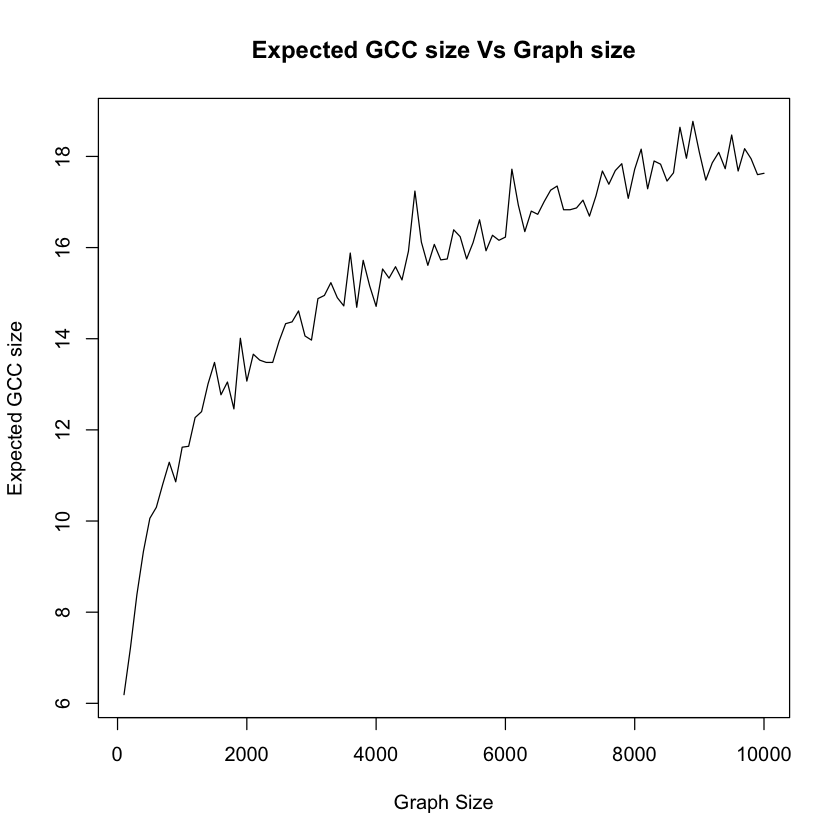

In [68]:
do_expected_gcc(0.5)

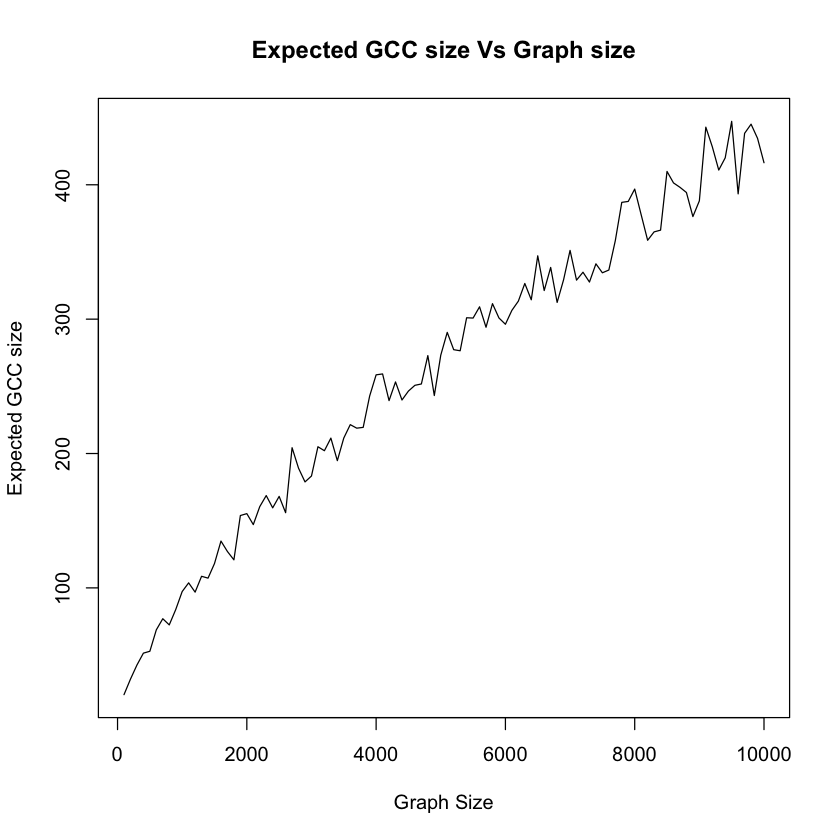

In [69]:
do_expected_gcc(1)

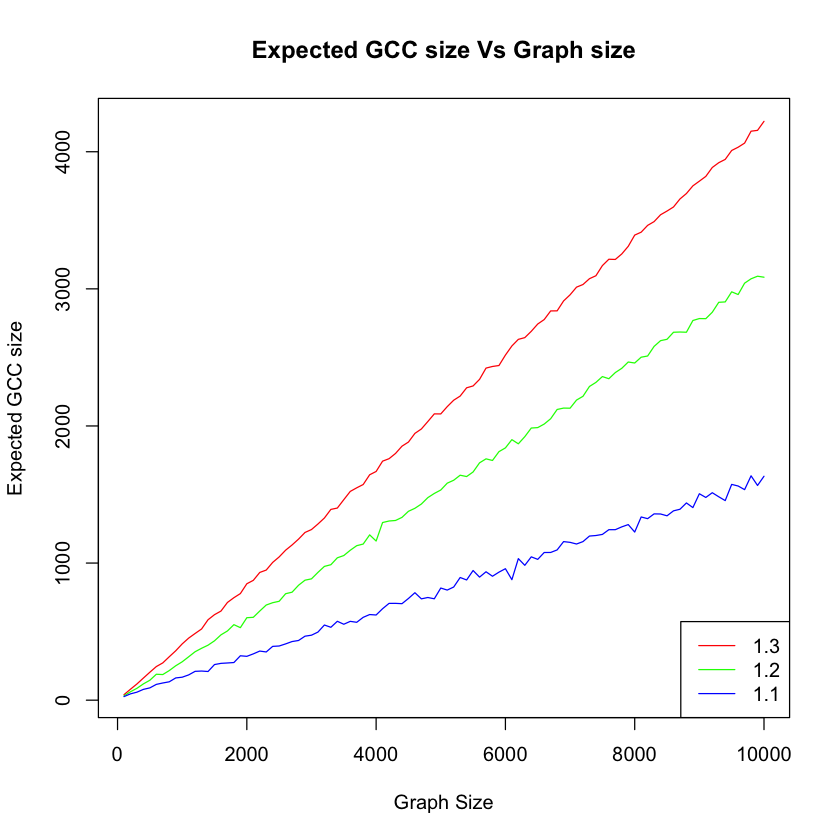

In [71]:
#lines(y = cl,x=nrange*100,main="Expected GCC size Vs Graph size",xlab="Graph Size",ylab="Expected GCC size",type='l')
plot(col='red',y = do_expected_gcc(1.3,'False'),x=c(1:100)*100,main="Expected GCC size Vs Graph size",xlab="Graph Size",ylab="Expected GCC size",type='l')
legend("bottomright", legend=c('1.3','1.2','1.1'),col=c('red','green','blue'), lwd=1)

lines(col='green',y = do_expected_gcc(1.2,'False'),x=c(1:100)*100,main="Expected GCC size Vs Graph size",xlab="Graph Size",ylab="Expected GCC size",type='l')
lines(col= 'blue',y = do_expected_gcc(1.1,'False'),x=c(1:100)*100,main="Expected GCC size Vs Graph size",xlab="Graph Size",ylab="Expected GCC size",type='l')